## 🔗 **[Read Full Blog - Complete ML Project Titanic Survival Prediction](https://copyassignment.com/titanic-survival-prediction-machine-learning-project-part-1/)**

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Printing first 10 rows of the dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As you can see we have 891 entries in total but some of the columns have less than 891 entries so that means we have missing values in these columns Age, Cabin & Embarked. so we have to preprocess our data first before training our ml model. 

**Checking NULL Values**

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Ok so we have 177 null values in Age column.
* 687 missing values in Cabin column.
* 2 missing values in Embarked column.

## **Plotting Heat Map 🗺️** 
* To see the correlation between target variable and other parameters.

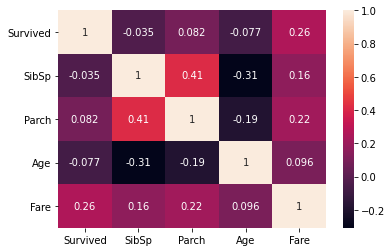

In [6]:
heatmap = sns.heatmap(train[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

**Conclusion:** 
Only Fare feature seems to have a significant correlation with the survival probability.

# **3. Exploratory Data Analysis 📉**

Now we're going to visualise the correlation of each variable with the target variable i.e, Survived.

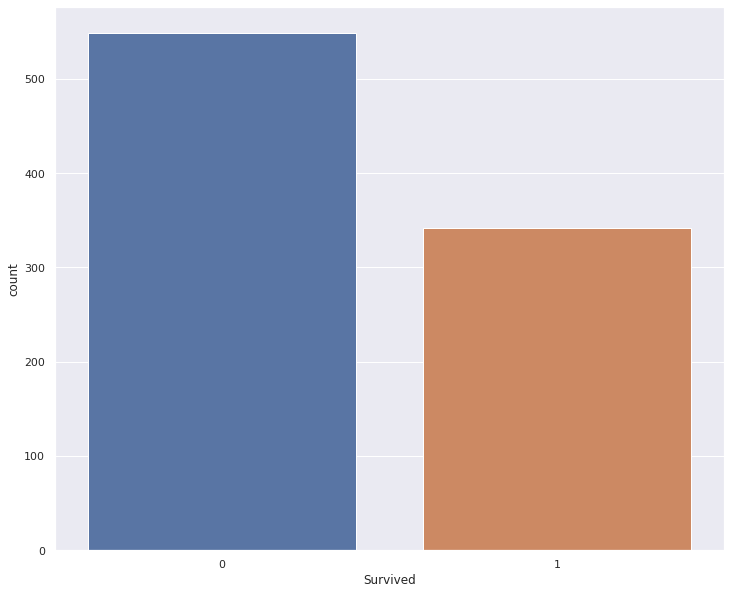

In [7]:
# Checking for people who survived and didn't survive
sns.countplot(train.Survived)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


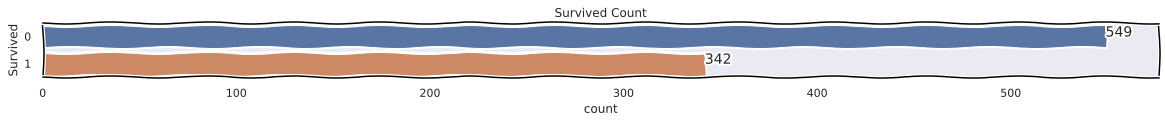

In [8]:
# How many people survived?
with plt.xkcd():
    fig = plt.figure(figsize=(20,1))
    sns.countplot(y='Survived', data=train);
    print(train.Survived.value_counts())
    
    y = train.Survived.value_counts()

    for index, count in enumerate(y):
        plt.text(count, index,
                 str(count))
    plt.title("Survived Count")

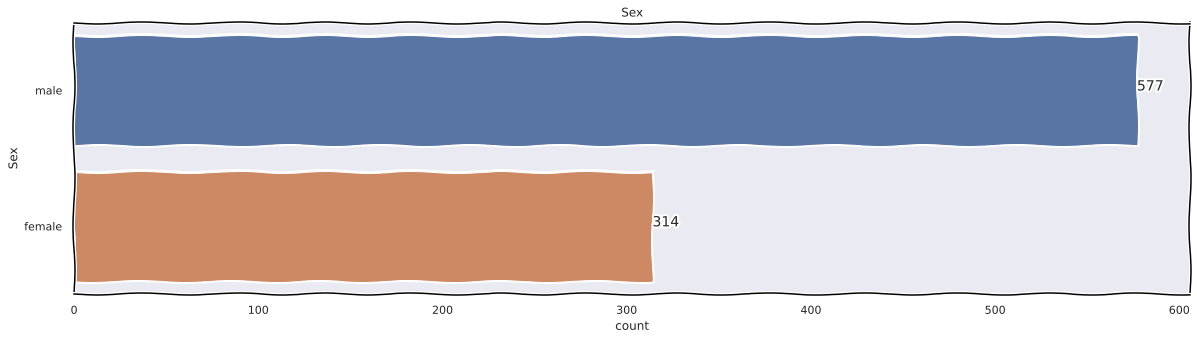

In [9]:
# Viewing the distribution of Sex
with plt.xkcd():
    plt.figure(figsize=(20, 5))
    sns.countplot(y="Sex", data=train)
    
     
    y = train.Sex.value_counts()

    for index, count in enumerate(y):
        plt.text(count, index,
                 str(count))
    
    plt.title("Sex")

In [10]:
def bar_chart_stacked(dataset, feature, stacked = True):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived,dead])
    df_survived_dead.index = ['Passengers Survived','Passengers Died']
    ax = df_survived_dead.plot(kind='bar',stacked=stacked, figsize=(5,5))

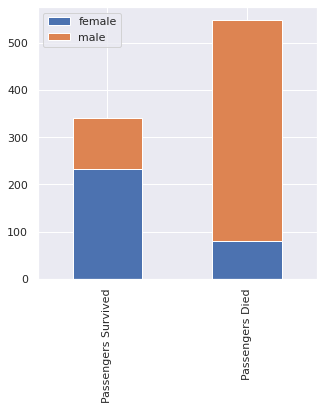

In [11]:
# Checking the men and female who survived.
bar_chart_stacked(train, "Sex")

In [12]:
train.groupby(['Sex']).Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


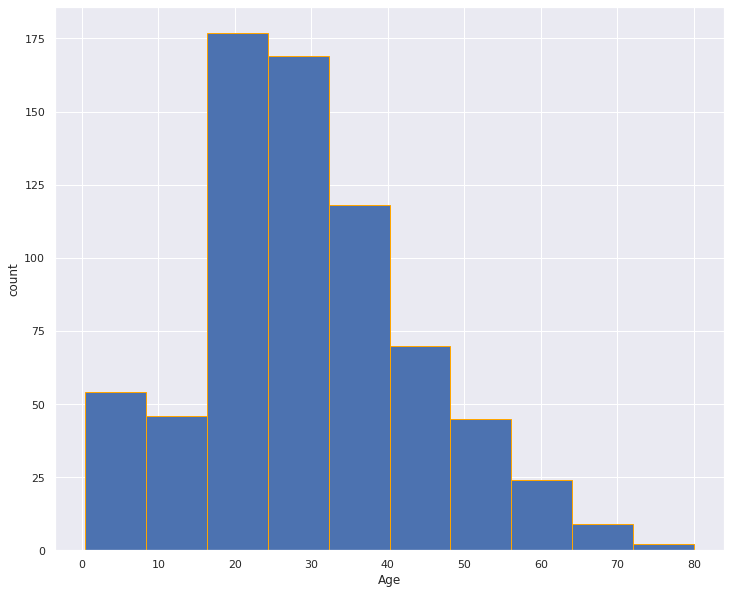

In [13]:
#Viewing the age distribution
plt.hist(train.Age, edgecolor= 'orange')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

Age is right skewed. Most of the people in the ship were from age 20-40.

<AxesSubplot:xlabel='Age', ylabel='Density'>

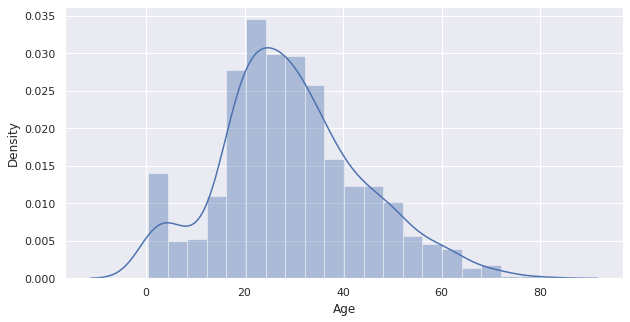

In [14]:
# Age distribution
plt.figure(figsize=(10,5))
sns.distplot(train['Age'])

Most of people who are on the ship are between 20-40 years of age

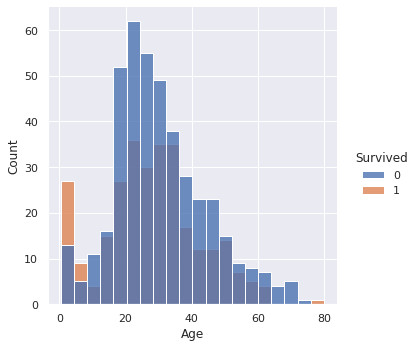

In [15]:
# Ages that died or survived
sns.displot(x='Age', hue='Survived', data=train, alpha=0.8)
plt.show()

Young people between the age 0-10 had more chance of survival.

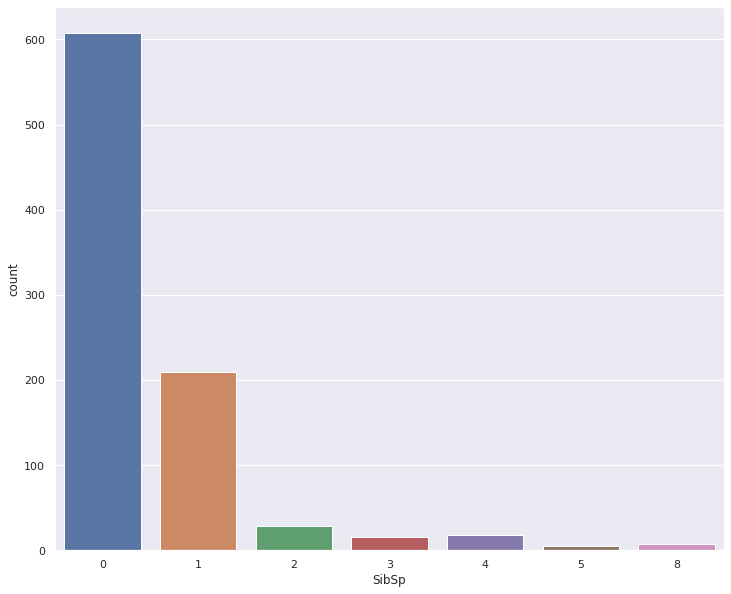

In [16]:
# Viewing SibSp
sns.countplot(train.SibSp)
plt.show()

In [17]:
train['SibSp'].value_counts().to_frame()

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [18]:
def bar_chart_compare(dataset, feature1, feature2=None, title = "Survival rate by siblings / spouses aboard the Titanic"):
    plt.figure(figsize = [5,5])
    plt.title(title)
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, ci=None, data=dataset).set_ylabel('Survival rate')

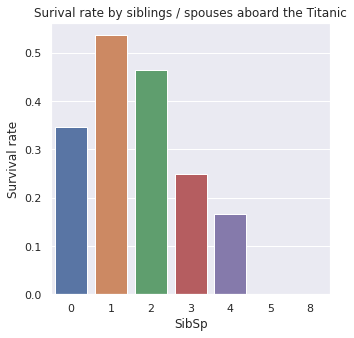

In [19]:
bar_chart_compare(train, "SibSp", title = "Surival rate by siblings / spouses aboard the Titanic")

In [20]:
train.groupby(['SibSp']).Survived.mean().to_frame()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [21]:
def count_plot(dataset, feature, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    sns.countplot(dataset[feature], ax=ax).set_title(title)
    
def compare_plot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax=ax).set_title(title)

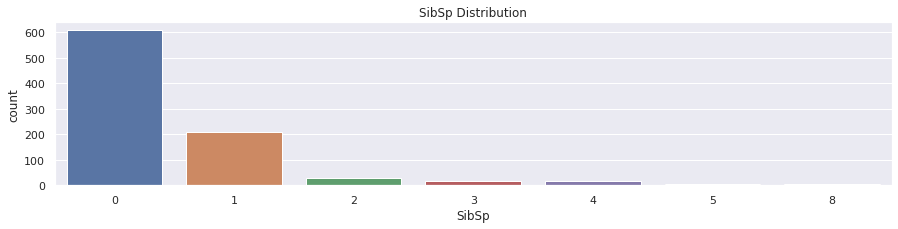

In [22]:
count_plot(train, "SibSp", 'SibSp Distribution', (15,3))

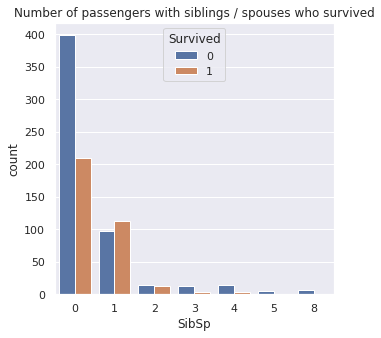

In [23]:
compare_plot(train, "SibSp", "Survived", "Number of passengers with siblings / spouses who survived")

The majority of the passengers traveled alone.The more siblings a passenger has the less chance of survival.

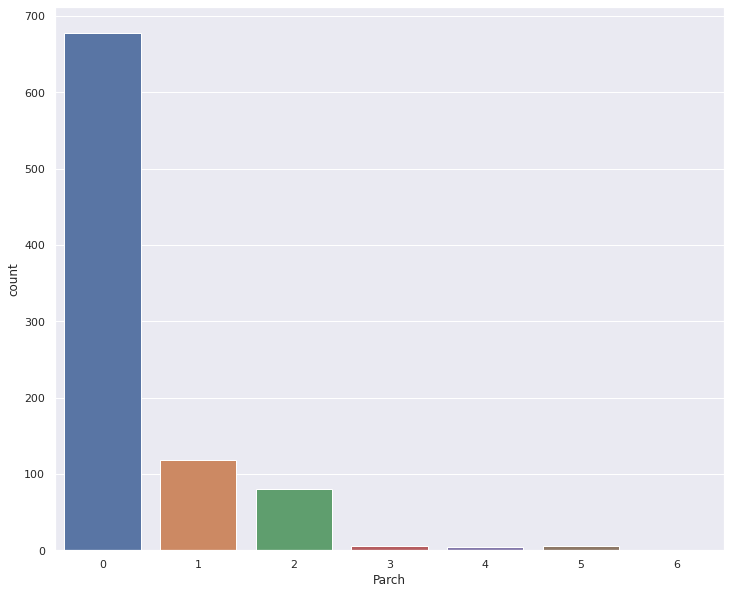

In [24]:
# Viewing Parch
sns.countplot(train.Parch)
plt.show()

In [25]:
train.groupby(['Parch']).Survived.mean().to_frame()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


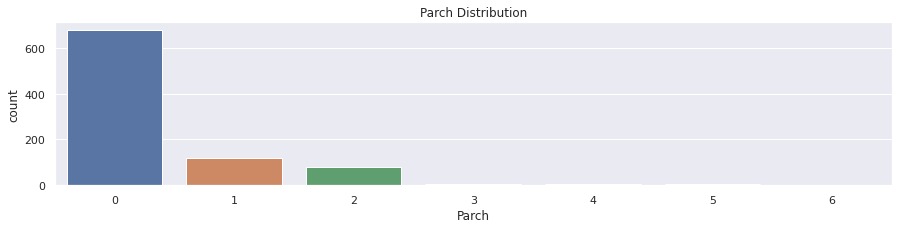

In [26]:
count_plot(train, "Parch", 'Parch Distribution', (15,3))

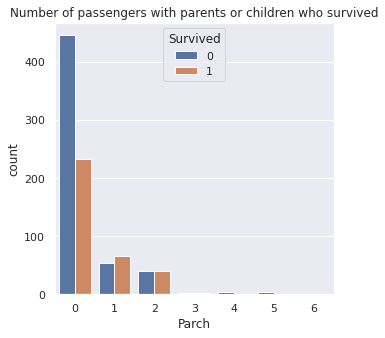

In [27]:
compare_plot(train, "Parch", "Survived", "Number of passengers with parents or children who survived")

Small families had highest chances of survival

In [28]:
# Viewing PClass
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [29]:
train.groupby(['Pclass']).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Most of the Class 1 passengers (62.9%) survived.

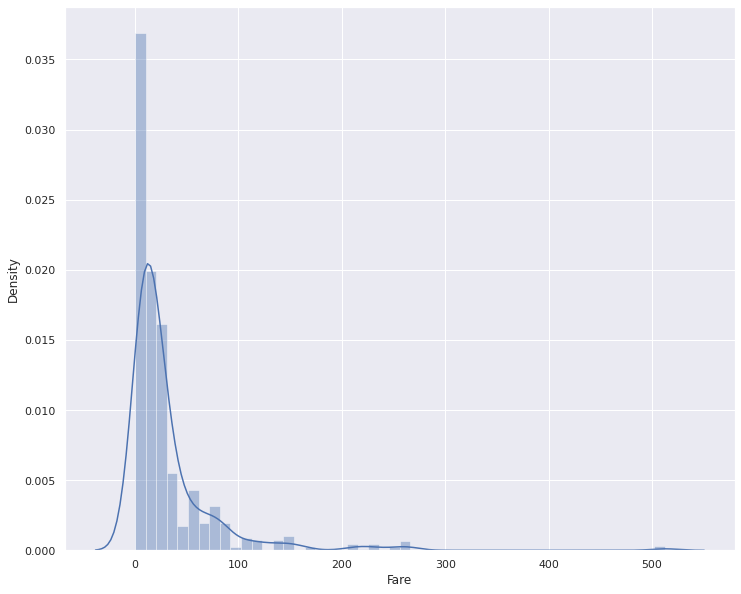

In [30]:
# Viewing Fare
sns.distplot(train.Fare)
plt.show()


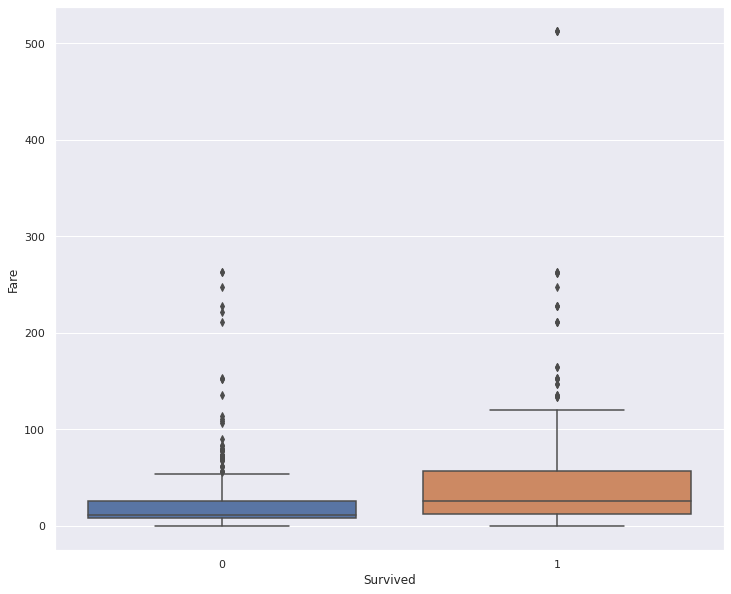

In [31]:
sns.boxplot(x='Survived', y='Fare', data=train)
plt.show()

People who paid high fares have a higher chance of survival.

# **Analysing the correlation of Port of embarkment**

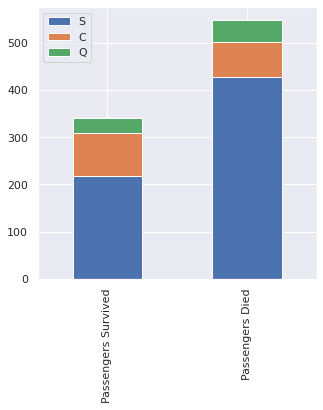

In [32]:
bar_chart_stacked(train, 'Embarked')

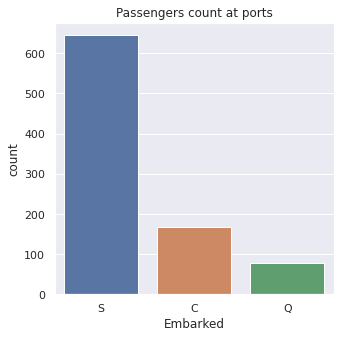

In [33]:
count_plot(train, "Embarked", 'Passengers count at ports')

More people embarked at Southampton

In [34]:
train['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [35]:
train.groupby(['Embarked']).Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


The majority of passengers embarked from Southampton. However, only 33% survived. The highest survival rate of 55% is in the group of passengers that embarked from Cherbourg. Why Cherboug? Maybe the percentage of Class 1.

In [36]:
train.groupby(['Embarked', 'Pclass']).Survived.count().to_frame()

Survived
Embarked Pclass          
C        1             85
         2             17
         3             66
Q        1              2
         2              3
         3             72
S        1            127
         2            164
         3            353

The majority that embarked on S were in Class 3. Those embarked on C were in Class 1. This can explain the high mortality rate of people of S as class 3 is the least eqquiped class

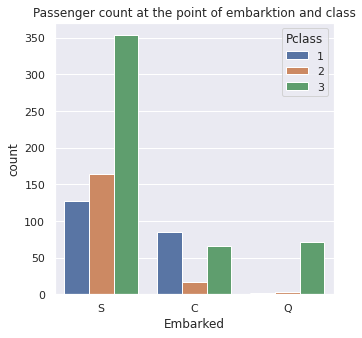

In [37]:
compare_plot(train, "Embarked", "Pclass", "Passenger count at the point of embarktion and class")

In [38]:
train.groupby(['Embarked', 'Sex']).Survived.sum().to_frame()

Survived
Embarked Sex             
C        female        64
         male          29
Q        female        27
         male           3
S        female       140
         male          77

In [39]:
# #Checking outliers
#outlier=train[['Survived','Pclass' ,'Age','SibSp','Parch','Fare']]
#q3 = outlier.quantile(0.75)
#q1 = outlier.quantile(0.25)
#IQR = q3 - q1
#((outlier < (q1 - 1.5 * IQR)) | (outlier > (q3 + 1.5 * IQR))).sum()

Age 11 outliers, Sibsp 46 outliers, Parch 213 outliers, Fare 116 outliers.

In [40]:
# Removing outliers
#train = train[~((train < (q1 - 1.5 * IQR)) |(train > (q3 + 1.5 * IQR))).any(axis=1)]

# Preprocessing Data

# Test data

In [41]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Printing first 10 rows of the dataset
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
pd.unique(train['Name'])

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [43]:
# Extracting titles from the names
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [44]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [46]:
train['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Mlle,2
Col,2
Capt,1


The titles are imbalanced. Grouping the less frequent into Mr and Miss

In [47]:
train['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess'], 'Miss', inplace=True)
test['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess'], 'Miss', inplace=True)
train['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [48]:
# Since Sibsp and Parch are not very informative, combine them into Fam_size feature
train['Fam_size'] = train['SibSp'] + train['Parch'] + 1
test['Fam_size'] = test['SibSp'] + test['Parch'] + 1

In [49]:
# Family type
# Creation of four groups
train['Fam_type'] = pd.cut(train.Fam_size, [0,1,4,7,11], labels=['Single', 'Small', 'Big', 'Very big'])
test['Fam_type'] = pd.cut(test.Fam_size, [0,1,4,7,11], labels=['Single', 'Small', 'Big', 'Very big'])

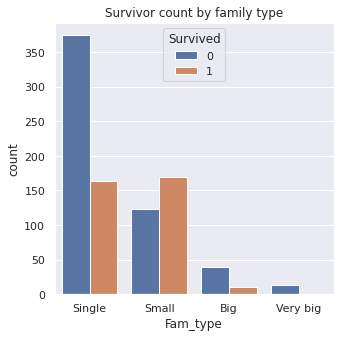

In [50]:
compare_plot(train, "Fam_type", "Survived", "Survivor count by family type")

In [51]:
# Dropping columns that can't be used for prediction
# Cabin dropped because it have 77% of missing values
train=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test=test.drop(['Name','Cabin','Ticket'],axis=1)

In [52]:
# The handling of missing values 
# Imputing median not mean to the train dataset's Age column because Age is right skewed
median = train["Age"].median()
mediantest = test["Age"].median()
train["Age"].fillna(median, inplace=True)
test["Age"].fillna(median, inplace=True)

In [53]:
# Embarked has 2 missing values, the mode is imputed
train['Embarked'].fillna(train.Embarked.mode()[0], inplace=True) 

In [54]:
# Checking for missing values
null_values = train.isna().sum()
null_values[null_values>0]

Series([], dtype: int64)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    object  
 8   Title     891 non-null    object  
 9   Fam_size  891 non-null    int64   
 10  Fam_type  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 70.8+ KB


**no null**

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         417 non-null    float64 
 7   Embarked     418 non-null    object  
 8   Title        418 non-null    object  
 9   Fam_size     418 non-null    int64   
 10  Fam_type     418 non-null    category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 33.4+ KB


In [57]:
testfare = test['Fare'].median()
test['Fare'].fillna(median, inplace=True)

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Embarked     418 non-null    object  
 8   Title        418 non-null    object  
 9   Fam_size     418 non-null    int64   
 10  Fam_type     418 non-null    category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 33.4+ KB


In [59]:
test['Embarked'].fillna(test.Embarked.mode()[0], inplace=True) 

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Embarked     418 non-null    object  
 8   Title        418 non-null    object  
 9   Fam_size     418 non-null    int64   
 10  Fam_type     418 non-null    category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 33.4+ KB


In [61]:
test['Title'].fillna(test.Embarked.mode()[0], inplace=True)

In [62]:
# mean = test["Fare"].mean()
# test["Fare"].fillna(mean, inplace=True)

In [63]:
# Feature transformation

# Transforming the Sex attribute to numeric
gender = {"male": 0, "female": 1}
titanicdata = [train, test]

for dataset in titanicdata:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [64]:
# Transforming the Title attribute to numeric
title = {"Mr": 0, "Mrs": 1,"Miss": 2,"Master": 3,"Rev": 4,"Dr": 5}
titanicdata = [train, test]

for dataset in titanicdata:
    dataset['Title'] = dataset['Title'].map(title)

In [65]:
# Transforming the Fam_type attribute to numeric
fam_type = {"Single": 0, "Small": 1,"Big": 2,"Very big": 3}
titanicdata = [train, test]

for dataset in titanicdata:
    dataset['Fam_type'] = dataset['Fam_type'].map(fam_type)

In [66]:
# Transforming the Embarked attribute to numeric
parts = {"S": 0, "C": 1, "Q": 2}
titanicdata = [train, test]
for dataset in titanicdata:
    dataset['Embarked'] = dataset['Embarked'].map(parts)

In [67]:
# Transforming the Fare attribute from float to int and categorizing
titanicdata = [train, test]

for dataset in titanicdata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 15), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 30), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


In [68]:
# Transforming the Age attribute from float to int and categorizing
titanicdata = [train, test]

for dataset in titanicdata:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 6

# Modelling

In [69]:
# Import the required libraries
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [70]:
X = train.drop('Survived', axis=1) # dropping the target attribute from the train dataset.
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)  # dataset splitting
# Checking for data imbalance
print("Imbalanced Classification:")
count= Counter(y)
print(count)

# handling data imbalance using the SMOTE technique
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
print("Balanced Classification:")
count = Counter(y)
print(count)

Imbalanced Classification:
Counter({0: 549, 1: 342})
Balanced Classification:
Counter({0: 549, 1: 549})


In [71]:
from sklearn.ensemble import RandomForestClassifier

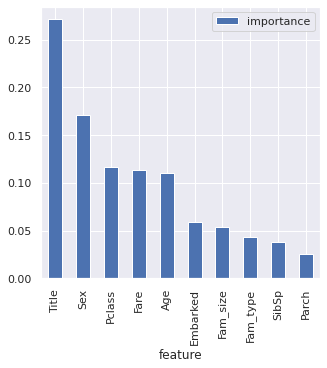

In [72]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', figsize = (5,5))
plt.show()

In [73]:
features = ['Title','Sex','Pclass','Fare','Fam_size','Embarked','Fam_type']

In [74]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [75]:
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}
gd_sr = GridSearchCV(estimator=model,
 param_grid=grid_param,
 scoring='accuracy', 
 cv=5,
 n_jobs=-1)
gd_sr.fit(X_train[features], y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 200}


In [76]:
model = RandomForestClassifier(n_estimators=300, bootstrap=True, criterion= 'entropy', min_samples_leaf=5, min_samples_split=20)

In [77]:
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
all_accuracies
all_accuracies.mean()

0.8328277356446371

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    int64   
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    int64   
 7   Embarked     418 non-null    int64   
 8   Title        417 non-null    float64 
 9   Fam_size     418 non-null    int64   
 10  Fam_type     418 non-null    category
dtypes: category(1), float64(1), int64(9)
memory usage: 33.4 KB


In [79]:
mediantest = test['Title'].median()
test['Title'].fillna(median, inplace=True)

In [80]:
test['Title'] = test['Title'].astype(int)

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    int64   
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    int64   
 7   Embarked     418 non-null    int64   
 8   Title        418 non-null    int64   
 9   Fam_size     418 non-null    int64   
 10  Fam_type     418 non-null    category
dtypes: category(1), int64(10)
memory usage: 33.4 KB


In [82]:
X_test = test[features]
model.fit(X_train[features],y_train)
prediction = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction.astype(int)})
output.to_csv('ppceb.csv', index=False)

In [83]:
output.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


**Choosing the best model**

# Final Submission ✔️

In [84]:
#output.to_csv('Simbarashe_Aldrin_submission.csv', index=False)